In [43]:
from __future__ import print_function
import pandas as pd
import numpy as np
from itertools import product
import sys,os
import time

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("/home/olya/SFU/Breast_cancer/DESMOND/"))

from find_optimal_parameters import *

%matplotlib inline

In [44]:
# and prefix of input file name
fname_prefix = "simulated.N=10.Mu=2.0.GxP="
# suffix idication overlap type
overlap = "TT"
# where are output files
out_dir = "../simulated_datasets/results/"

# sizes of biclusters
g_sizes = [5,10,20,50,100]
s_sizes = [10,20,50,100]

# true biclusters 
true_bic_dir = "../simulated_datasets/true_biclusters/"
true_bic_fname_prefix = fname_prefix
true_bic_fname_suffix = ".overlap="+overlap+".biclusters.txt"

In [45]:
# predicted biclusters 
tool_name = "QUBIC"
tool_suffix = "QUBIC_QB"
n_runs = 1

parameters = (("r",[1,2,3,4,5,7,10]),
              ("q",[0.05,0.06,0.1,0.25,0.5,0.75]),
              ("c",[0.95,0.75,0.6,0.65,0.5,0.8,0.85,0.9]),
              ("P",["T","F"]))

pred_bic_dir =  out_dir+tool_name+"/"
pred_bic_fname_prefix = fname_prefix
pred_bic_fname_suffix = ".overlap="+overlap+"."+tool_suffix+".biclust_results.txt"

img_outdir = out_dir + "/J/img"
tsv_outdir = out_dir + "/J/"

In [46]:
true_bic_fname = true_bic_fname_prefix+str(20)+","+str(100)+true_bic_fname_suffix 
true_bics = read_true_bics(true_bic_dir+true_bic_fname)

bic_file_path = '../simulated_datasets/results/QUBIC/r=2.q=0.5.c=0.75.P=T/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.QUBIC_QB.biclust_results.txt'
runs = parse_biclust(bic_file_path,n_runs=n_runs)
for i in range(0,n_runs):
    pred_bics = runs[i] 
    print(i, np.mean(F1_per_bic(true_bics, pred_bics)) )
    

0 0.06440003426980413


In [47]:
results= read_all_results(parameters,tool_name,n_runs=n_runs,
                          pred_bic_dir=pred_bic_dir,
                          pred_bic_fname_prefix=fname_prefix,
                          pred_bic_fname_suffix=pred_bic_fname_suffix,
                          true_bic_dir=true_bic_dir,
                          true_bic_fname_prefix=fname_prefix,
                          true_bic_fname_suffix=true_bic_fname_suffix)
results_outfile =  tsv_outdir+ tool_suffix+".results.tsv"
results.to_csv(results_outfile ,sep="\t")

File not found ../simulated_datasets/results/QUBIC/r=2.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=2.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=2.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=2.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=2.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=2.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=2.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT.QUBIC_QB.bic

File not found ../simulated_datasets/results/QUBIC/r=2.q=0.06.c=0.5.P=F/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=2.q=0.06.c=0.5.P=F/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=2.q=0.06.c=0.8.P=T/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=2.q=0.06.c=0.8.P=T/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=2.q=0.06.c=0.8.P=T/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=2.q=0.06.c=0.8.P=T/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=2.q=0.06.c=0.8.P=F/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT.QUBIC_QB.bi

File not found ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=20,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=50,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=50,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=3.q=0.06.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=100,10.overlap=TT.QUBIC_

File not found ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.QUBIC_QB.biclus

Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=10,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=10,20.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=10,20.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=4.q=0.06.c=0.85.P=T/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT.QUBIC_QB

File not found ../simulated_datasets/results/QUBIC/r=5.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=5.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=5.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=5.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=5.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=5.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=5.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_

Failed to parse ../simulated_datasets/results/QUBIC/r=5.q=0.06.c=0.8.P=T/simulated.N=10.Mu=2.0.GxP=100,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=5.q=0.06.c=0.8.P=T/simulated.N=10.Mu=2.0.GxP=100,20.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=5.q=0.06.c=0.8.P=T/simulated.N=10.Mu=2.0.GxP=100,20.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=5.q=0.06.c=0.8.P=T/simulated.N=10.Mu=2.0.GxP=100,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=5.q=0.06.c=0.8.P=T/simulated.N=10.Mu=2.0.GxP=100,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=5.q=0.06.c=0.8.P=F/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=5.q=0.06.c=0.8.P=F/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.bic

File not found ../simulated_datasets/results/QUBIC/r=7.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=7.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=7.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=7.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=7.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=7.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=7.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_

File not found ../simulated_datasets/results/QUBIC/r=7.q=0.06.c=0.5.P=F/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=7.q=0.06.c=0.5.P=F/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=7.q=0.06.c=0.5.P=F/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=7.q=0.06.c=0.5.P=F/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=7.q=0.06.c=0.5.P=F/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=7.q=0.06.c=0.5.P=F/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=7.q=0.06.c=0.5.P=F/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.biclust_results

File not found ../simulated_datasets/results/QUBIC/r=10.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=10.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=10.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=10.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,20.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=10.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=10.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,50.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=10.q=0.05.c=0.95.P=T/simulated.N=10.Mu=2.0.GxP=5,100.overlap=TT.QUBIC_QB.b

File not found ../simulated_datasets/results/QUBIC/r=10.q=0.06.c=0.5.P=F/simulated.N=10.Mu=2.0.GxP=10,50.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=10.q=0.06.c=0.5.P=F/simulated.N=10.Mu=2.0.GxP=10,50.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=10.q=0.06.c=0.5.P=F/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=10.q=0.06.c=0.5.P=F/simulated.N=10.Mu=2.0.GxP=10,100.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=10.q=0.06.c=0.5.P=F/simulated.N=10.Mu=2.0.GxP=20,10.overlap=TT.QUBIC_QB.biclust_results.txt
Failed to parse ../simulated_datasets/results/QUBIC/r=10.q=0.06.c=0.5.P=F/simulated.N=10.Mu=2.0.GxP=20,10.overlap=TT.QUBIC_QB.biclust_results.txt
File not found ../simulated_datasets/results/QUBIC/r=10.q=0.06.c=0.5.P=F/simulated.N=10.Mu=2.0.GxP=20,20.overlap=TT.QUBIC_QB.

Parameter combiations not found: 0
Successfull parameter combinations: 672
	files not found: 3456
	files empty: 0
	failed to parse: 3456
Total runs 13440
Non-zero runs: 9674


In [48]:
results["Geometric_Mean"] = np.sqrt(results["Relevance"]*results["Recovery"])
results

,n_genes,n_samples,q,P,c,r,n_biclusters,Relevance,Recovery,Geometric_Mean
0,5,10,0.05,T,0.95,1,10,0.056754,0.056754,0.056754
1,5,20,0.05,T,0.95,1,10,0.116997,0.112724,0.114840
2,5,50,0.05,T,0.95,1,10,0.095902,0.068778,0.081215
3,5,100,0.05,T,0.95,1,10,0.000000,0.000000,0.000000
4,10,10,0.05,T,0.95,1,10,0.082015,0.053957,0.066523
5,10,20,0.05,T,0.95,1,10,0.092803,0.065273,0.077830
6,10,50,0.05,T,0.95,1,10,0.052749,0.029149,0.039212
7,10,100,0.05,T,0.95,1,10,0.001975,0.001975,0.001975
8,20,10,0.05,T,0.95,1,10,0.049629,0.037064,0.042889
9,20,20,0.05,T,0.95,1,10,0.080342,0.042342,0.058325


In [49]:
parameters

(('r', [1, 2, 3, 4, 5, 7, 10]),
 ('q', [0.05, 0.06, 0.1, 0.25, 0.5, 0.75]),
 ('c', [0.95, 0.75, 0.6, 0.65, 0.5, 0.8, 0.85, 0.9]),
 ('P', ['T', 'F']))

Total combinations: 672
[(1, 0.25, 0.65, 'F') (1, 0.25, 0.6, 'F') (1, 0.25, 0.65, 'T')
 (1, 0.25, 0.6, 'T') (2, 0.75, 0.75, 'F') (2, 0.75, 0.65, 'F')
 (1, 0.25, 0.75, 'F') (2, 0.75, 0.8, 'F') (2, 0.75, 0.6, 'F')
 (2, 0.75, 0.75, 'T') (2, 0.75, 0.65, 'T') (1, 0.25, 0.8, 'F')
 (1, 0.5, 0.8, 'F') (1, 0.25, 0.75, 'T') (3, 0.75, 0.65, 'F')
 (2, 0.75, 0.8, 'T') (2, 0.75, 0.6, 'T') (1, 0.5, 0.85, 'F')
 (1, 0.25, 0.5, 'F') (1, 0.5, 0.75, 'F')]
Top 20 paramter combinations


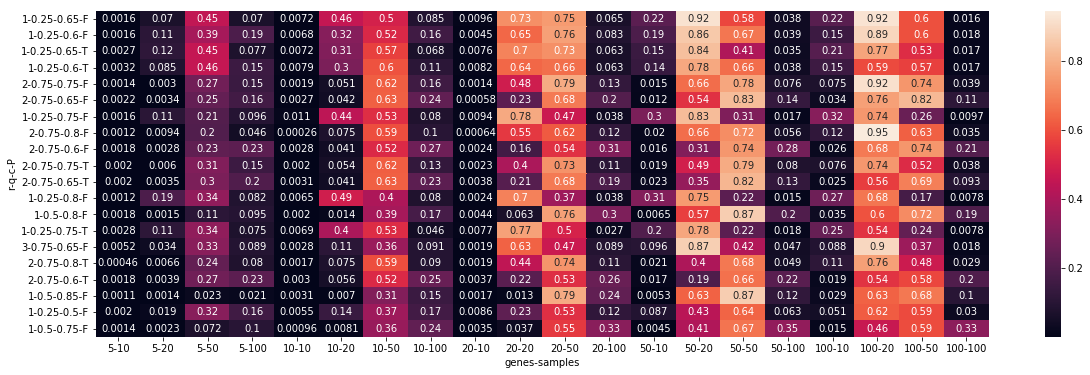

In [50]:
params = [x[0] for x in parameters]
heatmap = plot_performance_heatmap(results,params,top=20,what="Geometric_Mean",
                          g_sizes = g_sizes, s_sizes = s_sizes)

In [51]:
parameters

(('r', [1, 2, 3, 4, 5, 7, 10]),
 ('q', [0.05, 0.06, 0.1, 0.25, 0.5, 0.75]),
 ('c', [0.95, 0.75, 0.6, 0.65, 0.5, 0.8, 0.85, 0.9]),
 ('P', ['T', 'F']))

In [54]:
default_params = (1,0.06,0.95,"F")

In [55]:
r = get_opt_params(results, params, heatmap, default_params=default_params, what="Geometric_Mean", more_n_smaples = 0)
r

All 13440 runs considered

with Optimal parameters (Geometric_Mean --> max):
Geometric_Mean : 0.3356302693357996
(1, 0.25, 0.65, 'F')
0.0	0.07	0.45	0.07	0.01	0.46	0.5	0.09	0.01	0.73	0.75	0.06	0.22	0.92	0.58	0.04	0.22	0.92	0.6	0.02
	r=('Geometric_Mean', 'mean');
	q=('Geometric_Mean', 'std');
	c=('Geometric_Mean', 'count');
	P=('Relevance', 'mean');
	Max. avg. Geometric_Mean: 0.336 ± 0.326
	Max. avg. Relevance: 0.351 ± 0.335
	Max. avg. Recovery: 0.322 ± 0.319
	Max. avg. n_biclusters: 10.0 ± 0.0
With Default parameters:
(1, 0.06, 0.95, 'F')
0.05	0.19	0.1	0.0	0.07	0.09	0.05	0.0	0.04	0.06	0.03	0.0	0.02	0.03	0.01	0.0	0.01	0.02	0.01	0.0
	r=1;
	q=0.06;
	c=0.95;
	P=F;
	avg. Geometric_Mean: 0.04 ± 0.046
	avg. Relevance: 0.048 ± 0.053
	avg. Recovery: 0.033 ± 0.04
	avg. n_biclusters: 10.0 ± 0.0


,,,,Geometric_Mean,Relevance,Recovery,n_biclusters
,,,,mean,mean,mean,mean
r,q,c,P,,,,
1,0.25,0.65,F,0.33563,0.351068,0.322092,10.0
